In [1]:
spark

VBox()

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
0,application_1601299294064_0001,pyspark,idle,Link,Link,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [2]:
#df = spark.read.csv("/user/hadoop/deliq_customer_details_IV.csv", header = True, inferSchema = True)

df = spark.read.csv("s3://mynithbuck/logistic/deliq_customer_details_IV.csv",header = True, inferSchema = True)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [3]:
df.count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

36431

In [4]:
df.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----+---------------+----------+------------+---------------+-----------------+--------------------+--------------+-----------+------------+----------+-------+--------------------+--------------------+-------------------+------------+---+
|  AGE|CNT_FAM_MEMBERS|FLAG_PHONE|FLAG_OWN_CAR|FLAG_WORK_PHONE|NAME_HOUSING_TYPE| NAME_EDUCATION_TYPE|YEARS_EMPLOYED|CODE_GENDER|CNT_CHILDREN|FLAG_EMAIL|     ID|  NAME_FAMILY_STATUS|    NAME_INCOME_TYPE|OCCUPATION_TYPE_NEW|Months_delay|  y|
+-----+---------------+----------+------------+---------------+-----------------+--------------------+--------------+-----------+------------+----------+-------+--------------------+--------------------+-------------------+------------+---+
|32.89|            2.0|         0|           Y|              1| Rented apartment|    Higher education|         12.44|          M|           0|         0|5008804|      Civil marriage|             Working|             Others|           0|  0|
|32.89|            2.0|         0|  

In [5]:
df.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- AGE: double (nullable = true)
 |-- CNT_FAM_MEMBERS: double (nullable = true)
 |-- FLAG_PHONE: integer (nullable = true)
 |-- FLAG_OWN_CAR: string (nullable = true)
 |-- FLAG_WORK_PHONE: integer (nullable = true)
 |-- NAME_HOUSING_TYPE: string (nullable = true)
 |-- NAME_EDUCATION_TYPE: string (nullable = true)
 |-- YEARS_EMPLOYED: double (nullable = true)
 |-- CODE_GENDER: string (nullable = true)
 |-- CNT_CHILDREN: integer (nullable = true)
 |-- FLAG_EMAIL: integer (nullable = true)
 |-- ID: integer (nullable = true)
 |-- NAME_FAMILY_STATUS: string (nullable = true)
 |-- NAME_INCOME_TYPE: string (nullable = true)
 |-- OCCUPATION_TYPE_NEW: string (nullable = true)
 |-- Months_delay: integer (nullable = true)
 |-- y: integer (nullable = true)

In [6]:
# find the number of catagories in each columns 
# use the countdistinct method
# create a list of all columns and then loop through each column counting the distinct values in it. 

from pyspark.sql.functions import col, countDistinct

df.agg(*(countDistinct(col(c)).alias(c) for c in df.columns)).show()

# here * instructs the agg function to accept whatever number of columns are inside the brakets. 

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----+---------------+----------+------------+---------------+-----------------+-------------------+--------------+-----------+------------+----------+-----+------------------+----------------+-------------------+------------+---+
| AGE|CNT_FAM_MEMBERS|FLAG_PHONE|FLAG_OWN_CAR|FLAG_WORK_PHONE|NAME_HOUSING_TYPE|NAME_EDUCATION_TYPE|YEARS_EMPLOYED|CODE_GENDER|CNT_CHILDREN|FLAG_EMAIL|   ID|NAME_FAMILY_STATUS|NAME_INCOME_TYPE|OCCUPATION_TYPE_NEW|Months_delay|  y|
+----+---------------+----------+------------+---------------+-----------------+-------------------+--------------+-----------+------------+----------+-----+------------------+----------------+-------------------+------------+---+
|3861|              6|         2|           2|              2|                6|                  5|          1891|          2|           5|         2|36431|                 5|               5|                 19|          61|  2|
+----+---------------+----------+------------+---------------+--------------

In [7]:
# drop colums which have lot of dictinct catagories. 

#df=df.drop('AGE','YEARS_EMPLOYED','ID')
df=df.drop('AGE','ID','YEARS_EMPLOYED')
df.columns

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

['CNT_FAM_MEMBERS', 'FLAG_PHONE', 'FLAG_OWN_CAR', 'FLAG_WORK_PHONE', 'NAME_HOUSING_TYPE', 'NAME_EDUCATION_TYPE', 'CODE_GENDER', 'CNT_CHILDREN', 'FLAG_EMAIL', 'NAME_FAMILY_STATUS', 'NAME_INCOME_TYPE', 'OCCUPATION_TYPE_NEW', 'Months_delay', 'y']

# Algorithm Building

In [8]:
# import all the necessary libraries 

from pyspark.sql.functions import udf
from pyspark.sql.types import IntegerType
from pyspark.ml.feature import StringIndexer, OneHotEncoderEstimator, VectorAssembler

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [9]:
from pyspark.sql.functions import udf
from pyspark.sql.types import IntegerType

posMapper = udf(lambda x: 1 if x =='Y' else 0)
df = df.withColumn('FLAG_OWN_CAR_1', posMapper(df['FLAG_OWN_CAR']))
df = df.withColumn("FLAG_EMAIL_1", posMapper(df['FLAG_EMAIL']))
df = df.withColumn("FLAG_OWN_CAR_NEW", df['FLAG_OWN_CAR_1'].cast(IntegerType()))
df = df.withColumn("FLAG_EMAIL_NEW", df['FLAG_EMAIL_1'].cast(IntegerType()))
df = df.withColumn("CNT_FAM_MEMBERS_NEW", df['CNT_FAM_MEMBERS'].cast(IntegerType()))


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [10]:
df = df.drop("FLAG_OWN_CAR_1","FLAG_OWN_CAR","FLAG_EMAIL_1","FLAG_EMAIL","CNT_FAM_MEMBERS")
df.columns

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

['FLAG_PHONE', 'FLAG_WORK_PHONE', 'NAME_HOUSING_TYPE', 'NAME_EDUCATION_TYPE', 'CODE_GENDER', 'CNT_CHILDREN', 'NAME_FAMILY_STATUS', 'NAME_INCOME_TYPE', 'OCCUPATION_TYPE_NEW', 'Months_delay', 'y', 'FLAG_OWN_CAR_NEW', 'FLAG_EMAIL_NEW', 'CNT_FAM_MEMBERS_NEW']

In [11]:
df.select('FLAG_OWN_CAR_NEW',"FLAG_EMAIL_NEW").show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------------+--------------+
|FLAG_OWN_CAR_NEW|FLAG_EMAIL_NEW|
+----------------+--------------+
|               1|             0|
|               1|             0|
|               1|             0|
|               0|             0|
|               0|             0|
|               0|             0|
|               0|             0|
|               0|             0|
|               0|             0|
|               0|             0|
|               1|             0|
|               1|             0|
|               1|             0|
|               1|             0|
|               1|             0|
|               1|             0|
|               1|             0|
|               1|             0|
|               1|             0|
|               1|             0|
+----------------+--------------+
only showing top 20 rows

In [12]:
# create a list of catagorical columns wich are represented by integers. these will not be sent through the one hot encoder

cCols = ['FLAG_OWN_CAR_NEW','FLAG_EMAIL_NEW','FLAG_PHONE','FLAG_WORK_PHONE','CNT_FAM_MEMBERS_NEW']


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [13]:
cCols

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

['FLAG_OWN_CAR_NEW', 'FLAG_EMAIL_NEW', 'FLAG_PHONE', 'FLAG_WORK_PHONE', 'CNT_FAM_MEMBERS_NEW']

In [14]:
df.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- FLAG_PHONE: integer (nullable = true)
 |-- FLAG_WORK_PHONE: integer (nullable = true)
 |-- NAME_HOUSING_TYPE: string (nullable = true)
 |-- NAME_EDUCATION_TYPE: string (nullable = true)
 |-- CODE_GENDER: string (nullable = true)
 |-- CNT_CHILDREN: integer (nullable = true)
 |-- NAME_FAMILY_STATUS: string (nullable = true)
 |-- NAME_INCOME_TYPE: string (nullable = true)
 |-- OCCUPATION_TYPE_NEW: string (nullable = true)
 |-- Months_delay: integer (nullable = true)
 |-- y: integer (nullable = true)
 |-- FLAG_OWN_CAR_NEW: integer (nullable = true)
 |-- FLAG_EMAIL_NEW: integer (nullable = true)
 |-- CNT_FAM_MEMBERS_NEW: integer (nullable = true)

In [15]:
# run the string indexer on the columns which are categorical but are represented by strings.
# adding a string on the end of the output column to make it easy to identify

stringCols = ['CODE_GENDER','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','OCCUPATION_TYPE_NEW']
for c in stringCols:
    outCol = c + '_ix'
    si = StringIndexer(inputCol=c, outputCol=outCol)
    df = si.fit(df).transform(df)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [16]:
cCols += ['CODE_GENDER_ix','NAME_FAMILY_STATUS_ix','NAME_HOUSING_TYPE_ix','NAME_INCOME_TYPE_ix','NAME_EDUCATION_TYPE_ix','OCCUPATION_TYPE_NEW_ix']

cCols

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

['FLAG_OWN_CAR_NEW', 'FLAG_EMAIL_NEW', 'FLAG_PHONE', 'FLAG_WORK_PHONE', 'CNT_FAM_MEMBERS_NEW', 'CODE_GENDER_ix', 'NAME_FAMILY_STATUS_ix', 'NAME_HOUSING_TYPE_ix', 'NAME_INCOME_TYPE_ix', 'NAME_EDUCATION_TYPE_ix', 'OCCUPATION_TYPE_NEW_ix']

In [17]:
# run all the categorical columns through the one hot encoder 

ohe = OneHotEncoderEstimator(inputCols=cCols, outputCols=[c+'Enc' for c in cCols])
enc_model = ohe.fit(df)
df = enc_model.transform(df)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [18]:
df.columns

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

['FLAG_PHONE', 'FLAG_WORK_PHONE', 'NAME_HOUSING_TYPE', 'NAME_EDUCATION_TYPE', 'CODE_GENDER', 'CNT_CHILDREN', 'NAME_FAMILY_STATUS', 'NAME_INCOME_TYPE', 'OCCUPATION_TYPE_NEW', 'Months_delay', 'y', 'FLAG_OWN_CAR_NEW', 'FLAG_EMAIL_NEW', 'CNT_FAM_MEMBERS_NEW', 'CODE_GENDER_ix', 'NAME_FAMILY_STATUS_ix', 'NAME_HOUSING_TYPE_ix', 'NAME_INCOME_TYPE_ix', 'NAME_EDUCATION_TYPE_ix', 'OCCUPATION_TYPE_NEW_ix', 'OCCUPATION_TYPE_NEW_ixEnc', 'FLAG_PHONEEnc', 'CODE_GENDER_ixEnc', 'NAME_HOUSING_TYPE_ixEnc', 'FLAG_EMAIL_NEWEnc', 'NAME_EDUCATION_TYPE_ixEnc', 'FLAG_OWN_CAR_NEWEnc', 'CNT_FAM_MEMBERS_NEWEnc', 'NAME_FAMILY_STATUS_ixEnc', 'NAME_INCOME_TYPE_ixEnc', 'FLAG_WORK_PHONEEnc']

In [19]:
# use the vector assember to combine all the encoded columns and the continuous variable columns 

# add the neumerical columns to the list of encoded traning columns
trainCols = [c+'Enc' for c in cCols]
trainCols += ["CNT_CHILDREN", "Months_delay"]
#configure the assembler object and use it to transform df
assembler = VectorAssembler(inputCols=trainCols, outputCol='features')
df = assembler.transform(df)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [22]:
# split the data into training and testing data set

df_train, df_test = df.randomSplit([0.7,0.3], seed = '2018')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [23]:
df_train.count(),df_test.count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

(25435, 10996)

In [24]:
df_train.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------+---------------+-----------------+-------------------+-----------+------------+--------------------+--------------------+-------------------+------------+---+----------------+--------------+-------------------+--------------+---------------------+--------------------+-------------------+----------------------+----------------------+-------------------------+-------------+-----------------+-----------------------+-----------------+-------------------------+-------------------+----------------------+------------------------+----------------------+------------------+--------------------+
|FLAG_PHONE|FLAG_WORK_PHONE|NAME_HOUSING_TYPE|NAME_EDUCATION_TYPE|CODE_GENDER|CNT_CHILDREN|  NAME_FAMILY_STATUS|    NAME_INCOME_TYPE|OCCUPATION_TYPE_NEW|Months_delay|  y|FLAG_OWN_CAR_NEW|FLAG_EMAIL_NEW|CNT_FAM_MEMBERS_NEW|CODE_GENDER_ix|NAME_FAMILY_STATUS_ix|NAME_HOUSING_TYPE_ix|NAME_INCOME_TYPE_ix|NAME_EDUCATION_TYPE_ix|OCCUPATION_TYPE_NEW_ix|OCCUPATION_TYPE_NEW_ixEnc|FLAG_PHONEEnc|CODE_GENDE

In [25]:
# train model in the training dataset

# import the logistic model
from pyspark.ml.classification import LogisticRegression

# create the logistic model, configure it and call fit it to the data. 
lr = LogisticRegression(featuresCol='features', labelCol='y')
model = lr.fit(df_train)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [26]:
# use the model to predict the class labels of test data. 

result_test = model.evaluate(df_test)

result_test.recallByLabel

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

[0.9999088339866897, 0.037037037037037035]

In [27]:
sc.list_packages()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Package                    Version
-------------------------- -------
beautifulsoup4             4.9.0  
boto                       2.49.0 
jmespath                   0.9.5  
lxml                       4.5.0  
mysqlclient                1.4.2  
nltk                       3.4.5  
nose                       1.3.4  
numpy                      1.16.5 
pip                        9.0.1  
py-dateutil                2.2    
python37-sagemaker-pyspark 1.3.0  
pytz                       2019.3 
PyYAML                     5.3.1  
setuptools                 28.8.0 
six                        1.13.0 
soupsieve                  1.9.5  
wheel                      0.29.0 
windmill                   1.6

In [28]:
sc.install_pypi_package("pandas==0.25.1") #Install pandas version 0.25.1 
sc.install_pypi_package("matplotlib", "https://pypi.org/simple") #Install matplotlib from given PyPI repository

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

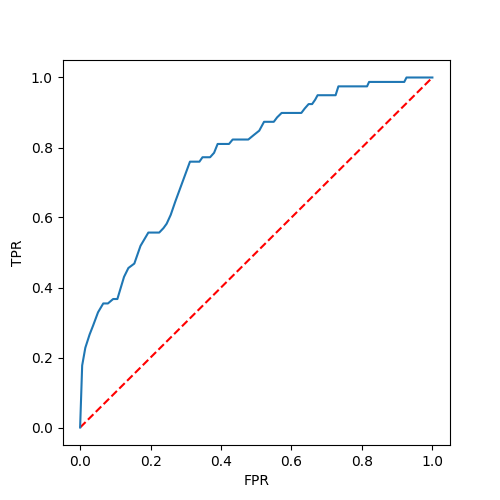

In [29]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.plot([0, 1], [0, 1], 'r--')
plt.plot(model.summary.roc.select('FPR').collect(),
         model.summary.roc.select('TPR').collect())
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()
%matplot plt

In [30]:
result_test.predictions.write.option("header", "true").parquet("s3n://mynithbuck/logistic/credit_card_details.parquet")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…